In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [3]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [5]:
df = pd.read_csv("breast_cancer.csv")

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# DATA PREPROCESSING
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
# M-> Malignint
# B-> Benign

In [10]:
# Supervised-> target
# Unsupervised
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
# missing value
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

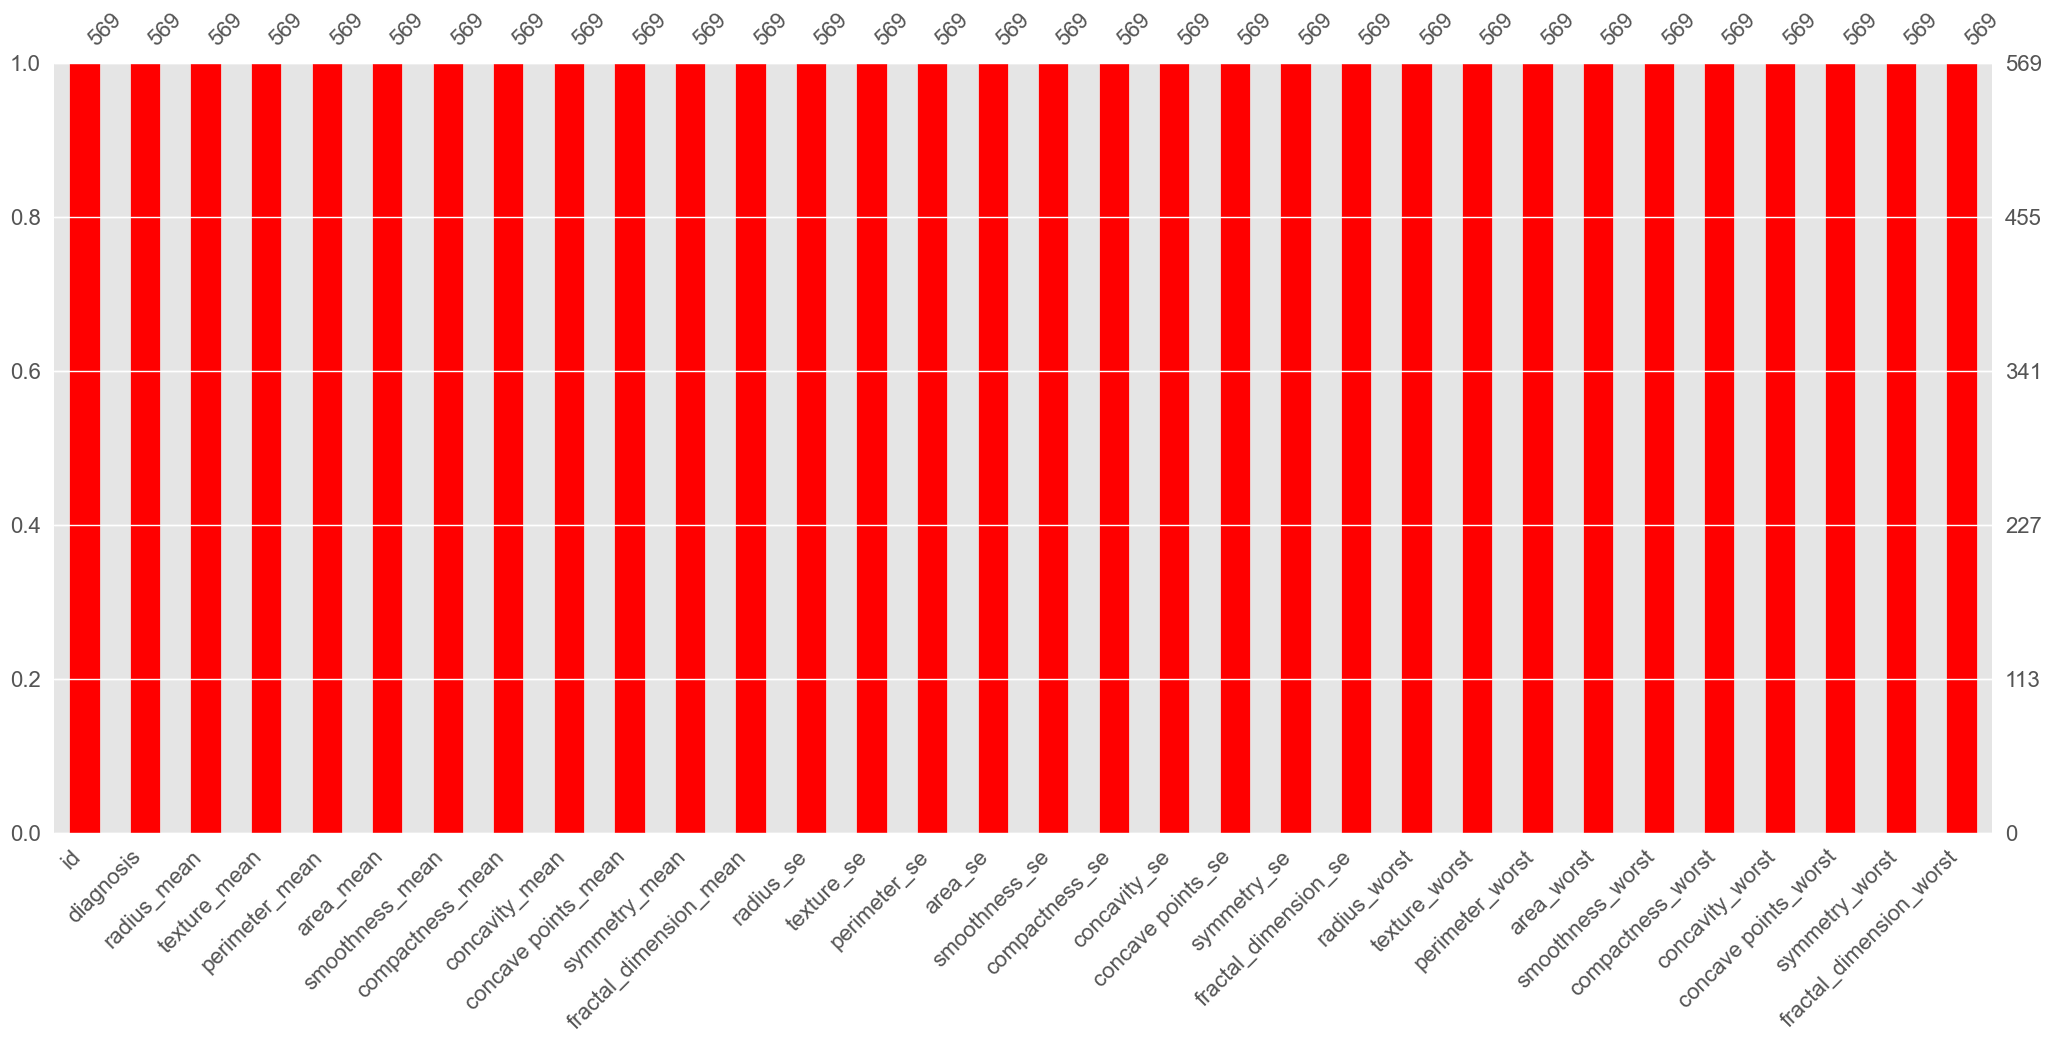

In [13]:
msno.bar(df, color="red")

In [14]:
# There are no missing value in the dataset

In [15]:
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val=='M' else 0)

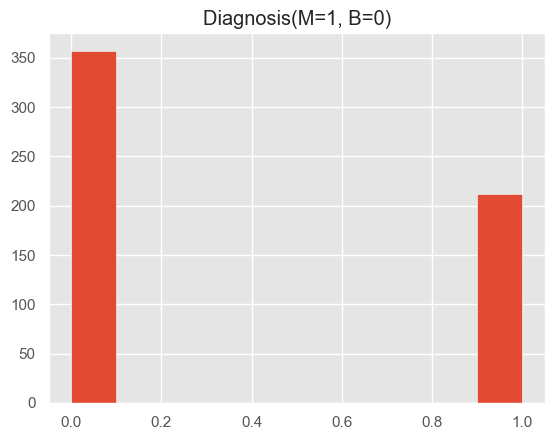

In [16]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis(M=1, B=0)')
plt.show()

In [17]:
# EDA

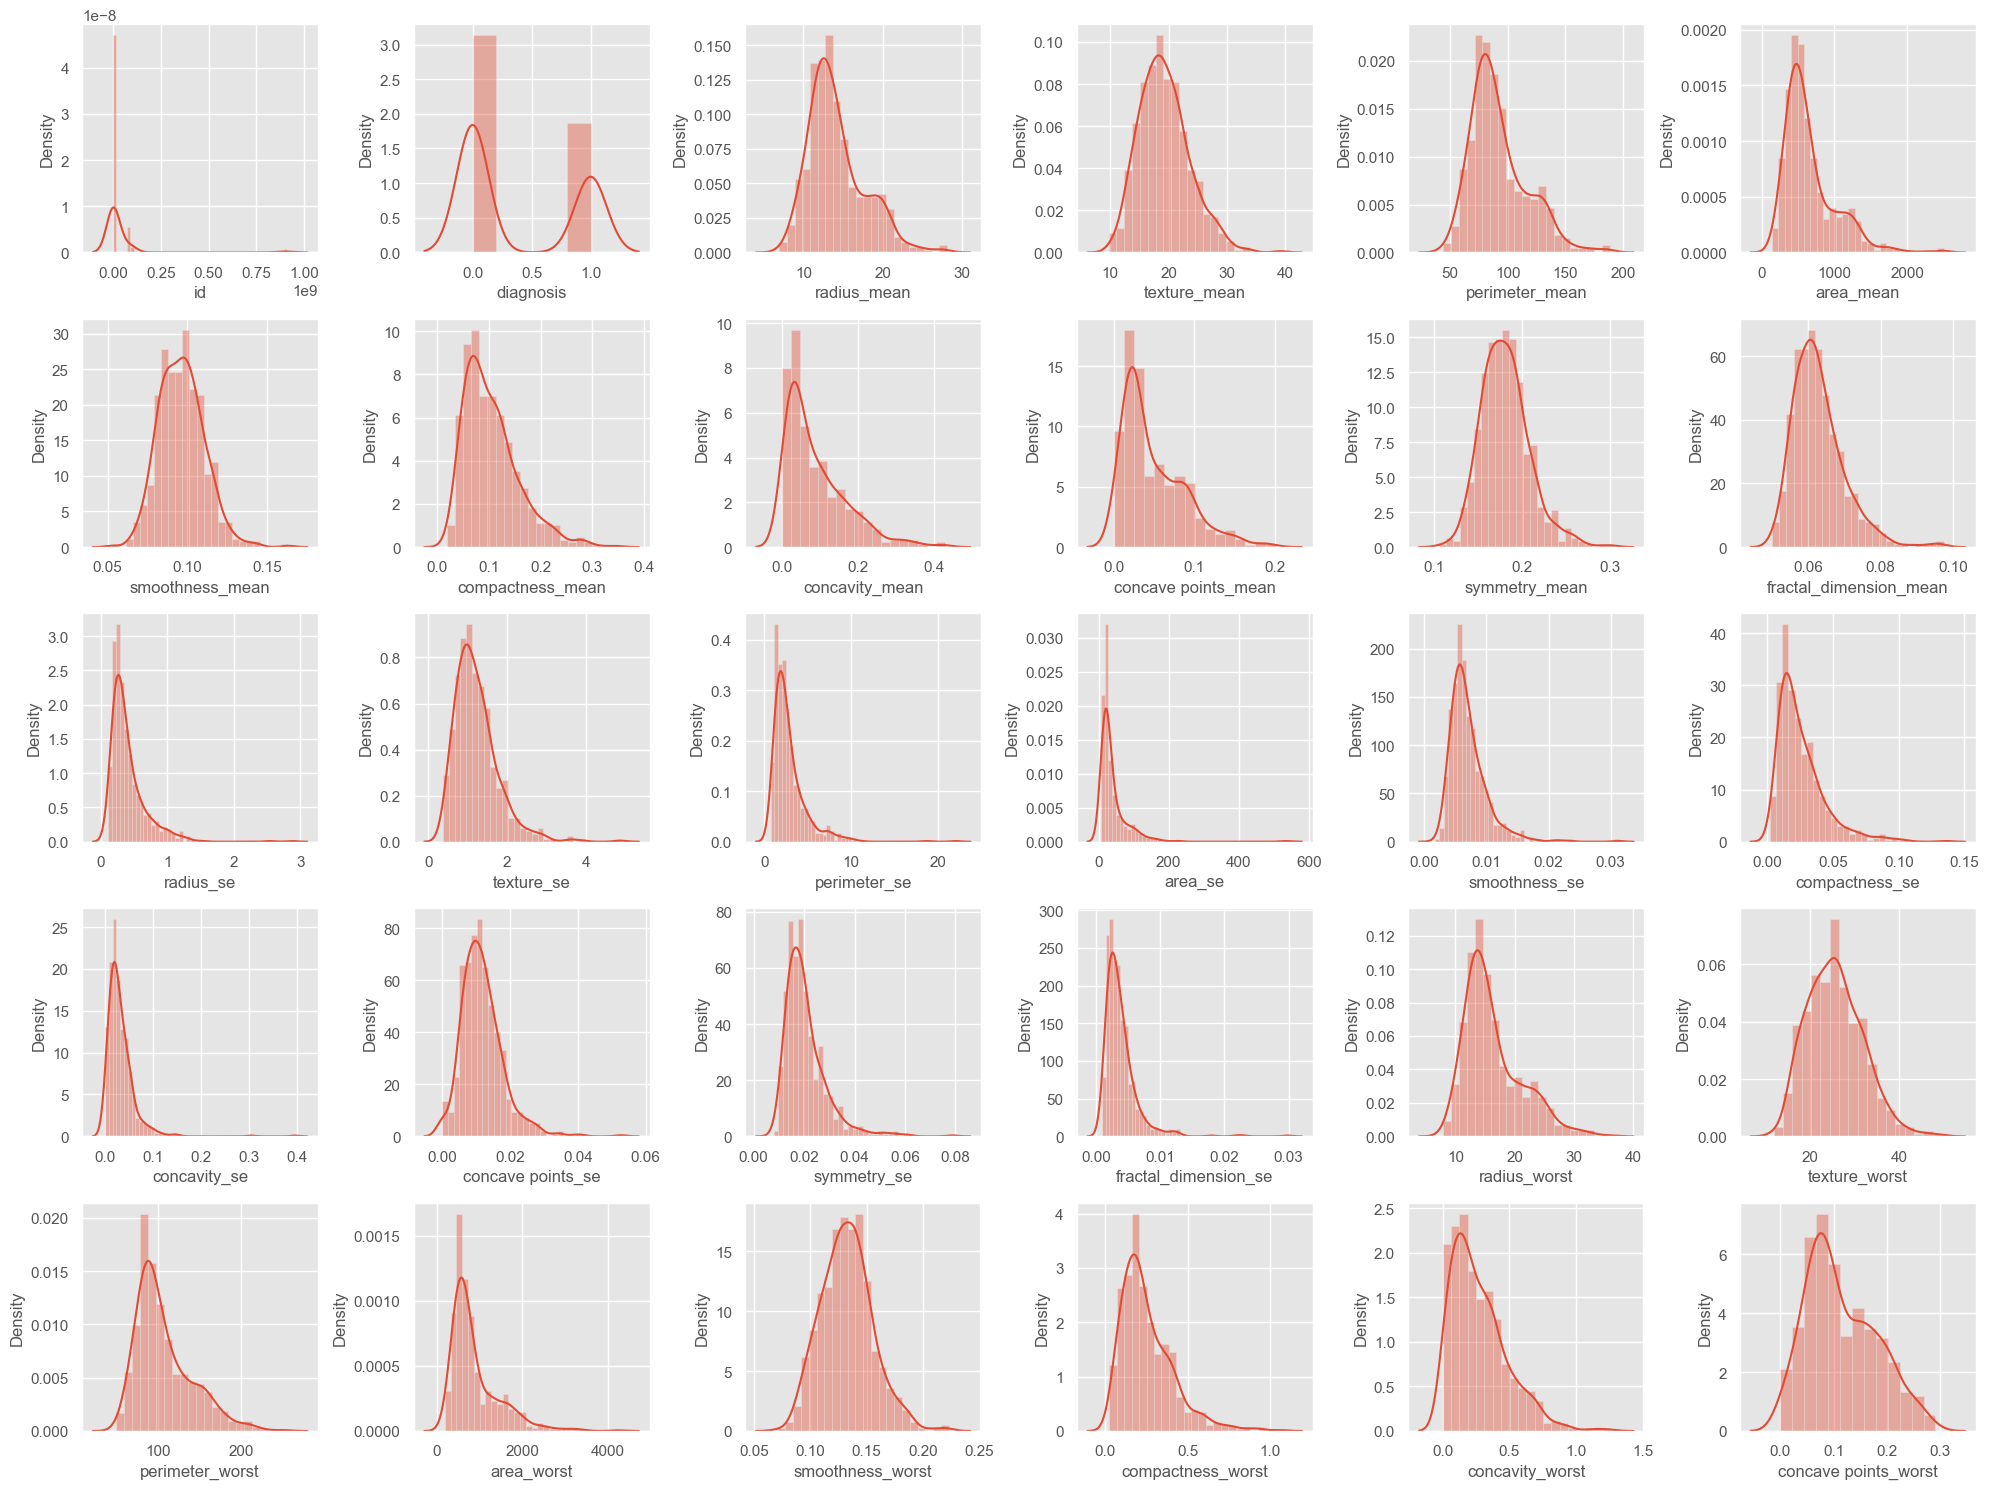

In [18]:
# each 5 row its having 6 columns
# density graph

plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax = plt.subplot(5,6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [19]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


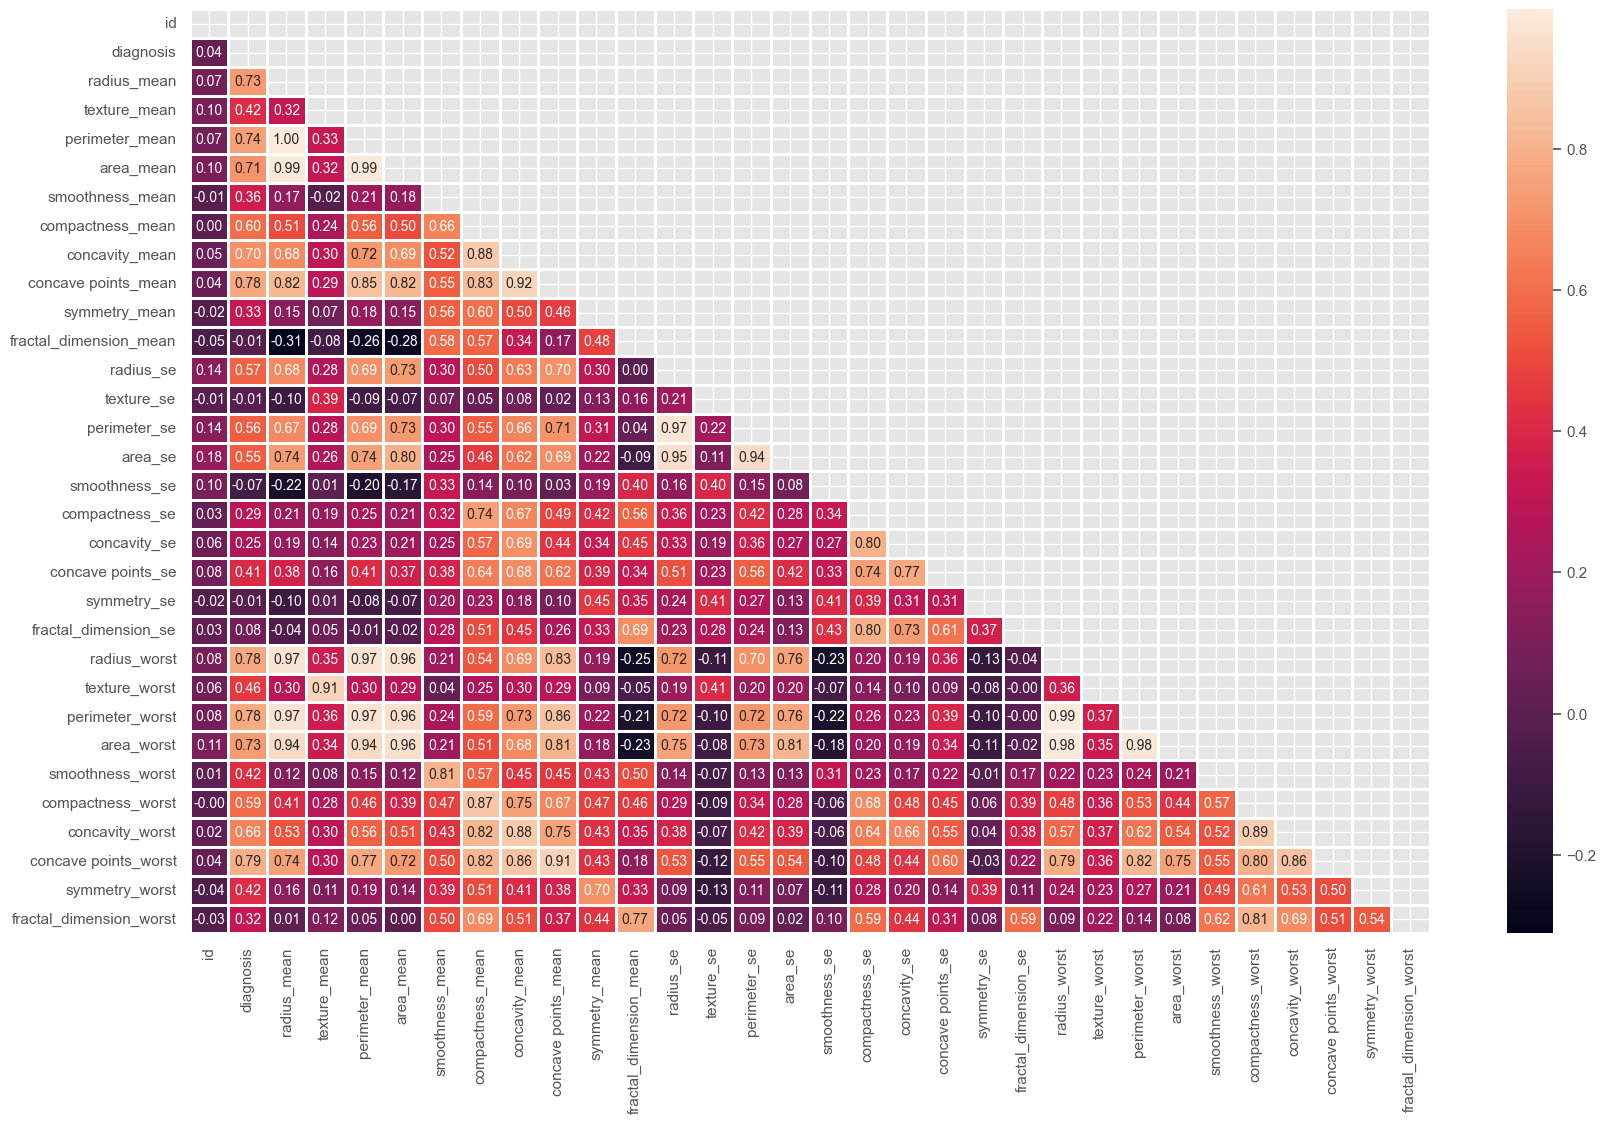

In [20]:
# heatmap
plt.figure(figsize=(20,12))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f")
plt.show()

In [21]:
# highly correlated feature
# multicollinearity

In [22]:
df.drop('id', axis=1, inplace=True)

In [23]:
# feature selection
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]

df = df.drop(to_drop, axis=1)

print(df.shape[1])

23


In [24]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
# 32 feature reduce it 23 now

In [27]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=0)

In [29]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train.shape

(455, 22)

In [31]:
# Apply Machine learning Algo

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = log_reg.predict(X_test)

In [34]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.989010989010989
0.9649122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [36]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = knn.predict(X_test)

In [38]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0])

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.967032967032967
0.956140350877193
[[66  1]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [40]:
# SVC
#Hyperparameter tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc= SVC(probability=True)

parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [41]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [42]:
grid_search.best_score_

np.float64(0.9802197802197803)

In [43]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.01, probability=True)

In [44]:
y_pred = svc.predict(X_test)

In [45]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.989010989010989
0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [48]:
# DT
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [50]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'random'}

In [51]:
grid_search_dt.best_score_

np.float64(0.9582417582417582)

In [52]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5, splitter = 'random')

In [53]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9758241758241758
0.9298245614035088
[[64  3]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [55]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [56]:
y_pred = rand_clf.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
y_pred = rand_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9978021978021978
0.9824561403508771
[[66  1]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 2, n_jobs = -5, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [59]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [60]:
grid_search_gbc.best_score_

np.float64(0.9560727258675323)

In [61]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 180)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=180)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.9649122807017544
[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [65]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [64]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 330.3 kB/s eta 0:07:34
   ---------------------------------------- 0.1/150.0 MB 660.6 kB/s eta 0:03:47
   ---------------------------------------- 0.4/150.0 MB 3.1 MB/s eta 0:00:49
   ---------------------------------------- 0.7/150.0 MB 3.9 MB/s eta 0:00:39
   ---------------------------------------- 0.9/150.0 MB 3.9 MB/s eta 0:00:39
   ---------------------------------------- 1.1/150.0 MB 3.9 MB/s eta 0:00:39
   ---------------------------------------- 1.2/150.0 MB 3.7 MB/s eta 0:00:41
   ---------------------------------------- 1.4/150.0 MB 3.7 MB/s eta 0:00:41
   ---------------------------------------- 1.6/150.0 MB 3.8 MB/s eta 0:00:39
   ---------------------------------------- 1.7/150.0 MB 3.7 MB/s eta 0:00

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9956043956043956
0.9473684210526315
[[64  3]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [68]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,98.25
4,Random Forest Classifier,98.25
0,Logistic Regression,96.49
5,Gradient Boosting Classifier,96.49
1,KNN,95.61
6,XgBoost,94.74
3,Decision Tree Classifier,92.98


In [69]:
import pickle
model = svc
pickle.dump(model, open("brest_cancer.pkl","wb"))

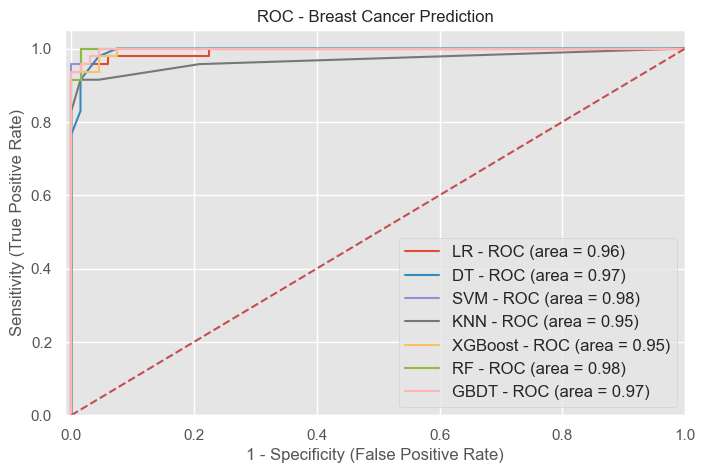

In [70]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[96.49, 92.97999999999999, 98.25, 95.61, 94.74000000000001, 98.25, 96.49]
[np.float64(96.06), np.float64(91.58), np.float64(97.87), np.float64(95.0), np.float64(94.57), np.float64(98.19), np.float64(97.44)]


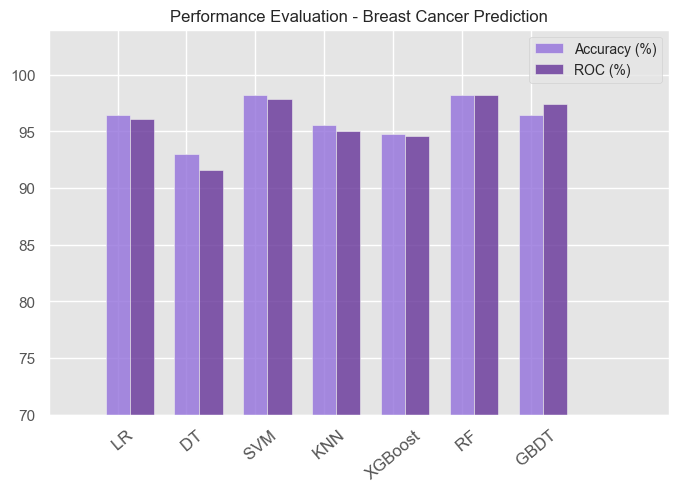

In [71]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [72]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model as 'model.pkl'
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained and saved as 'model.pkl'")


✅ Model trained and saved as 'model.pkl'


In [75]:


model = pickle.load(open('model_reduced.pkl', 'rb'))

# Try a clearly malignant sample
sample = np.array([[25, 180, 2500, 0.2, 30, 220, 3000, 0.3]])
print(model.predict(sample))  # Should print [1] or [0] depending on label


[1]


In [76]:
import pickle
import numpy as np

# Load the trained model
model = pickle.load(open("model_reduced.pkl", "rb"))


In [77]:
# Example values that usually result in non-cancer
non_cancer_input = np.array([[11.0, 72.0, 385.0, 0.04, 12.5, 80.0, 450.0, 0.03]])

# Predict
non_cancer_pred = model.predict(non_cancer_input)

# Output
print("Non-Cancer Test Prediction:", "Cancer Detected" if non_cancer_pred[0] == 1 else "No Cancer")


Non-Cancer Test Prediction: Cancer Detected


In [78]:
# Example values that are likely malignant
cancer_input = np.array([[18.0, 125.0, 1000.0, 0.15, 22.0, 150.0, 1300.0, 0.20]])

# Predict
cancer_pred = model.predict(cancer_input)

# Output
print("Cancer Test Prediction:", "Cancer Detected" if cancer_pred[0] == 1 else "No Cancer")


Cancer Test Prediction: Cancer Detected


In [79]:
import pandas as pd

df = pd.read_csv("breast_cancer.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [80]:
selected_features = [
    'radius_mean', 'perimeter_mean', 'area_mean',
    'concave points_mean', 'radius_worst', 'perimeter_worst',
    'area_worst', 'concave points_worst',
    'compactness_mean', 'concavity_mean'  # you can adjust these
]


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load dataset
df = pd.read_csv("breast_cancer.csv")

# Encode target variable (M = 1: cancer, B = 0: no cancer)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select features and target
X = df[selected_features]
y = df['diagnosis']


In [82]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model
with open("model_reduced.pkl", "wb") as f:
    pickle.dump(model, f)


In [83]:
sample = [[18.0, 125.0, 1000.0, 0.20, 22.0, 150.0, 1300.0, 0.21, 0.23, 0.28]]  # Just example values
prediction = model.predict(sample)
print("Result:", "Cancer Detected 😟" if prediction[0] == 1 else "No Cancer 🎉")


Result: Cancer Detected 😟


In [84]:
# Use all features temporarily
all_features = df.drop(columns=["id", "diagnosis"])
X_all = all_features
y_all = df["diagnosis"]

model_temp = RandomForestClassifier(random_state=42)
model_temp.fit(X_all, y_all)

# Get top 10 features
importances = model_temp.feature_importances_
feature_ranks = pd.Series(importances, index=all_features.columns).sort_values(ascending=False)
top_10 = feature_ranks.head(10).index.tolist()
print("Top 10 Features:", top_10)


Top 10 Features: ['area_worst', 'concave points_worst', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'perimeter_mean', 'concavity_mean', 'area_mean', 'concavity_worst', 'radius_mean']


In [85]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

# Load your dataset
df = pd.read_csv('breast_cancer.csv')

# Encode the target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop non-feature columns
X_all = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']


In [86]:
# Train a model on all features to get importances
model_temp = RandomForestClassifier(random_state=42)
model_temp.fit(X_all, y)

# Get top 10 features by importance
importances = model_temp.feature_importances_
feature_ranks = pd.Series(importances, index=X_all.columns).sort_values(ascending=False)
top_10 = feature_ranks.head(10).index.tolist()

print("Top 10 Selected Features:", top_10)


Top 10 Selected Features: ['area_worst', 'concave points_worst', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'perimeter_mean', 'concavity_mean', 'area_mean', 'concavity_worst', 'radius_mean']


In [87]:
# Prepare reduced dataset
X = df[top_10]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Final model training
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

# Save the reduced feature model
with open('model_reduced.pkl', 'wb') as f:
    pickle.dump(final_model, f)


In [88]:
# Example prediction
sample_input = [X_test.iloc[0].tolist()]
prediction = final_model.predict(sample_input)
print("Prediction:", "Cancer Detected 😟" if prediction[0] == 1 else "No Cancer 🎉")


Prediction: No Cancer 🎉


In [89]:
# Check actual labels in test set
print("Actual Labels in Test Set:", y_test.values[:5])

# Loop through first 5 samples to test predictions
for i in range(5):
    sample = [X_test.iloc[i].tolist()]
    pred = final_model.predict(sample)[0]
    actual = y_test.iloc[i]
    print(f"Sample {i+1}: Predicted = {'Cancer 😟' if pred == 1 else 'No Cancer 🎉'}, Actual = {'Cancer 😟' if actual == 1 else 'No Cancer 🎉'}")


Actual Labels in Test Set: [0 1 1 0 0]
Sample 1: Predicted = No Cancer 🎉, Actual = No Cancer 🎉
Sample 2: Predicted = Cancer 😟, Actual = Cancer 😟
Sample 3: Predicted = Cancer 😟, Actual = Cancer 😟
Sample 4: Predicted = No Cancer 🎉, Actual = No Cancer 🎉
Sample 5: Predicted = No Cancer 🎉, Actual = No Cancer 🎉


In [90]:
print("Total Cancer Cases in Test Set:", sum(y_test))
print("Total Non-Cancer Cases in Test Set:", len(y_test) - sum(y_test))


Total Cancer Cases in Test Set: 43
Total Non-Cancer Cases in Test Set: 71


In [92]:
for i in range(5):
    print(f"\nSample {i+1} Features:")
    print(X_test.iloc[i])  # ✅ Access row i safely

    features = X_test.iloc[i].values.reshape(1, -1)
    pred = model.predict(features)[0]
    
    pred_label = "Cancer 😟" if pred == 0 else "No Cancer 🎉"
    actual_label = "Cancer 😟" if y_test.iloc[i] == 0 else "No Cancer 🎉"

    print(f"Predicted = {pred_label}, Actual = {actual_label}")



Sample 1 Features:
area_worst              677.90000
concave points_worst      0.10150
concave points_mean       0.03821
radius_worst             14.97000
perimeter_worst          96.05000
perimeter_mean           81.09000
concavity_mean            0.08005
area_mean               481.90000
concavity_worst           0.26710
radius_mean              12.47000
Name: 204, dtype: float64
Predicted = No Cancer 🎉, Actual = Cancer 😟

Sample 2 Features:
area_worst              1866.00000
concave points_worst       0.17890
concave points_mean        0.07951
radius_worst              24.86000
perimeter_worst          165.90000
perimeter_mean           123.60000
concavity_mean             0.10800
area_mean               1130.00000
concavity_worst            0.26870
radius_mean               18.94000
Name: 70, dtype: float64
Predicted = No Cancer 🎉, Actual = No Cancer 🎉

Sample 3 Features:
area_worst              1156.00000
concave points_worst       0.15140
concave points_mean        0.08087
radiu

In [96]:
# Map diagnosis: 'M' = 0 (Cancer), 'B' = 1 (No Cancer)
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

# 🔥 Drop rows with NaN values (if any)
df = df.dropna(subset=['diagnosis'])


In [99]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("breast_cancer.csv")  # replace with your filename

# Step 1: Clean 'diagnosis' column
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

# Step 2: Drop rows where diagnosis couldn't be mapped (i.e., NaNs)
df = df.dropna(subset=['diagnosis'])

# Step 3: Select only the 10 features you want
selected_features = [
    'radius_mean', 'area_mean', 'perimeter_mean', 'concavity_mean',
    'concave points_mean', 'radius_worst', 'area_worst',
    'perimeter_worst', 'concavity_worst', 'concave points_worst'
]

# Make sure these columns exist in the dataset
df = df[selected_features + ['diagnosis']]

# Step 4: Split features and target
X = df[selected_features]
y = df['diagnosis']


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [101]:
selected_features = [
    'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
    'concave points_mean', 'radius_worst', 'perimeter_worst',
    'area_worst', 'concavity_worst', 'concave points_worst'
]


In [102]:
test_cases = [
    {
        "features": {
            'radius_mean': 14.2,
            'perimeter_mean': 88.4,
            'area_mean': 640.0,
            'concavity_mean': 0.08,
            'concave points_mean': 0.05,
            'radius_worst': 17.6,
            'perimeter_worst': 112.0,
            'area_worst': 950.0,
            'concavity_worst': 0.2,
            'concave points_worst': 0.1
        },
        "expected": "Cancer"
    },
    {
        "features": {
            'radius_mean': 12.3,
            'perimeter_mean': 78.0,
            'area_mean': 460.0,
            'concavity_mean': 0.03,
            'concave points_mean': 0.02,
            'radius_worst': 14.2,
            'perimeter_worst': 90.0,
            'area_worst': 660.0,
            'concavity_worst': 0.1,
            'concave points_worst': 0.07
        },
        "expected": "No Cancer"
    },
    {
        "features": {
            'radius_mean': 17.5,
            'perimeter_mean': 115.0,
            'area_mean': 1050.0,
            'concavity_mean': 0.12,
            'concave points_mean': 0.09,
            'radius_worst': 21.5,
            'perimeter_worst': 142.0,
            'area_worst': 1350.0,
            'concavity_worst': 0.3,
            'concave points_worst': 0.15
        },
        "expected": "Cancer"
    }
]


In [104]:
# Define features and target
selected_features = [
    'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
    'concave points_mean', 'radius_worst', 'perimeter_worst',
    'area_worst', 'concavity_worst', 'concave points_worst'
]

X = df[selected_features]
y = df['diagnosis']  # 0 = Cancer, 1 = No Cancer

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [105]:
import pandas as pd

# Test cases
test_cases = [
    {
        "features": {
            'radius_mean': 14.2,
            'perimeter_mean': 88.4,
            'area_mean': 640.0,
            'concavity_mean': 0.08,
            'concave points_mean': 0.05,
            'radius_worst': 17.6,
            'perimeter_worst': 112.0,
            'area_worst': 950.0,
            'concavity_worst': 0.2,
            'concave points_worst': 0.1
        },
        "expected": "Cancer"
    },
    {
        "features": {
            'radius_mean': 12.3,
            'perimeter_mean': 78.0,
            'area_mean': 460.0,
            'concavity_mean': 0.03,
            'concave points_mean': 0.02,
            'radius_worst': 14.2,
            'perimeter_worst': 90.0,
            'area_worst': 660.0,
            'concavity_worst': 0.1,
            'concave points_worst': 0.07
        },
        "expected": "No Cancer"
    }
]

# Predict using trained model
for i, test_case in enumerate(test_cases, 1):
    # Extract only the selected features in correct order
    test_input_df = pd.DataFrame([[test_case["features"][feature] for feature in selected_features]],
                                 columns=selected_features)

    prediction = model.predict(test_input_df)[0]
    prediction_label = "🎯 Cancer 😟" if prediction == 0 else "✅ No Cancer 🎉"

    print(f"\nTest Case {i}")
    print("Features:", test_case["features"])
    print(f"👉 Predicted: {prediction_label}")
    print(f"✅ Expected: {test_case['expected']}")



Test Case 1
Features: {'radius_mean': 14.2, 'perimeter_mean': 88.4, 'area_mean': 640.0, 'concavity_mean': 0.08, 'concave points_mean': 0.05, 'radius_worst': 17.6, 'perimeter_worst': 112.0, 'area_worst': 950.0, 'concavity_worst': 0.2, 'concave points_worst': 0.1}
👉 Predicted: ✅ No Cancer 🎉
✅ Expected: Cancer

Test Case 2
Features: {'radius_mean': 12.3, 'perimeter_mean': 78.0, 'area_mean': 460.0, 'concavity_mean': 0.03, 'concave points_mean': 0.02, 'radius_worst': 14.2, 'perimeter_worst': 90.0, 'area_worst': 660.0, 'concavity_worst': 0.1, 'concave points_worst': 0.07}
👉 Predicted: ✅ No Cancer 🎉
✅ Expected: No Cancer


In [107]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target  # 0 = malignant (Cancer), 1 = benign (No Cancer)

# Print available columns to choose from
print(df.columns.tolist())  # If you ever want to explore

# Select 10 valid columns from the dataset
selected_features = [
    'mean radius', 'mean perimeter', 'mean area',
    'mean concavity', 'mean concave points',
    'worst radius', 'worst perimeter', 'worst area',
    'worst concavity', 'worst concave points'
]

# Create new DataFrame
final_df = df[selected_features + ['diagnosis']]

# Rename columns to match your Flask form names (with underscores)
final_df.columns = [
    'radius_mean', 'perimeter_mean', 'area_mean',
    'concavity_mean', 'concave_points_mean',
    'radius_worst', 'perimeter_worst', 'area_worst',
    'concavity_worst', 'concave_points_worst',
    'diagnosis'
]

# Save to CSV
final_df.to_csv('breast_cancer_data.csv', index=False)
print("✅ CSV file saved successfully!")


['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'diagnosis']
✅ CSV file saved successfully!


In [109]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

# Step 1: Load CSV
df = pd.read_csv("breast_cancer_data.csv")

# Step 2: Split features and label
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

# Step 6: Save the model
with open("model_reduced.pkl", "wb") as f:
    pickle.dump(model, f)
print("✅ Model saved as 'model_reduced.pkl'")


✅ Model Accuracy: 88.33%
✅ Model saved as 'model_reduced.pkl'


In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target  # 0 = malignant (cancer), 1 = benign (no cancer)

# Select 10 features and rename columns
df = df[[
    'mean radius', 'mean perimeter', 'mean area',
    'mean concavity', 'mean concave points',
    'worst radius', 'worst perimeter', 'worst area',
    'worst concavity', 'worst concave points',
    'diagnosis'
]]

df.columns = [
    'radius_mean', 'perimeter_mean', 'area_mean',
    'concavity_mean', 'concave_points_mean',
    'radius_worst', 'perimeter_worst', 'area_worst',
    'concavity_worst', 'concave_points_worst',
    'diagnosis'
]


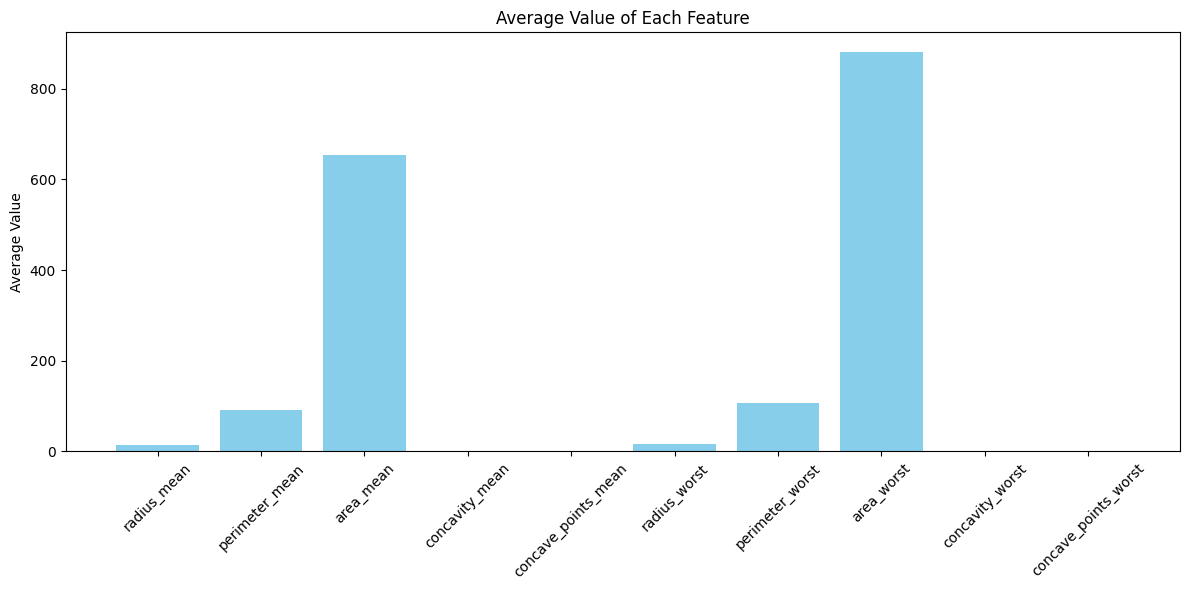

In [5]:
import matplotlib.pyplot as plt

# Calculate average values for each feature (excluding diagnosis)
feature_means = df.drop('diagnosis', axis=1).mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(feature_means.index, feature_means.values, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Average Value')
plt.title('Average Value of Each Feature')
plt.tight_layout()
plt.savefig("bar_chart_features.png")  # Save the chart
plt.show()


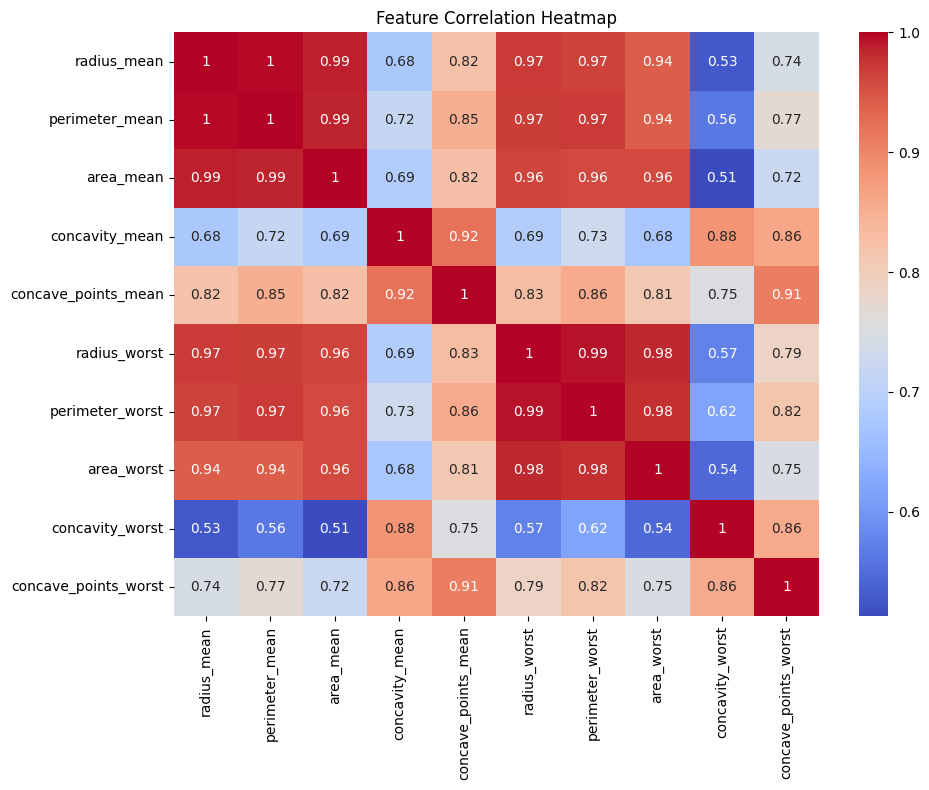

In [6]:
import seaborn as sns

# Compute correlation matrix
corr = df.drop('diagnosis', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()


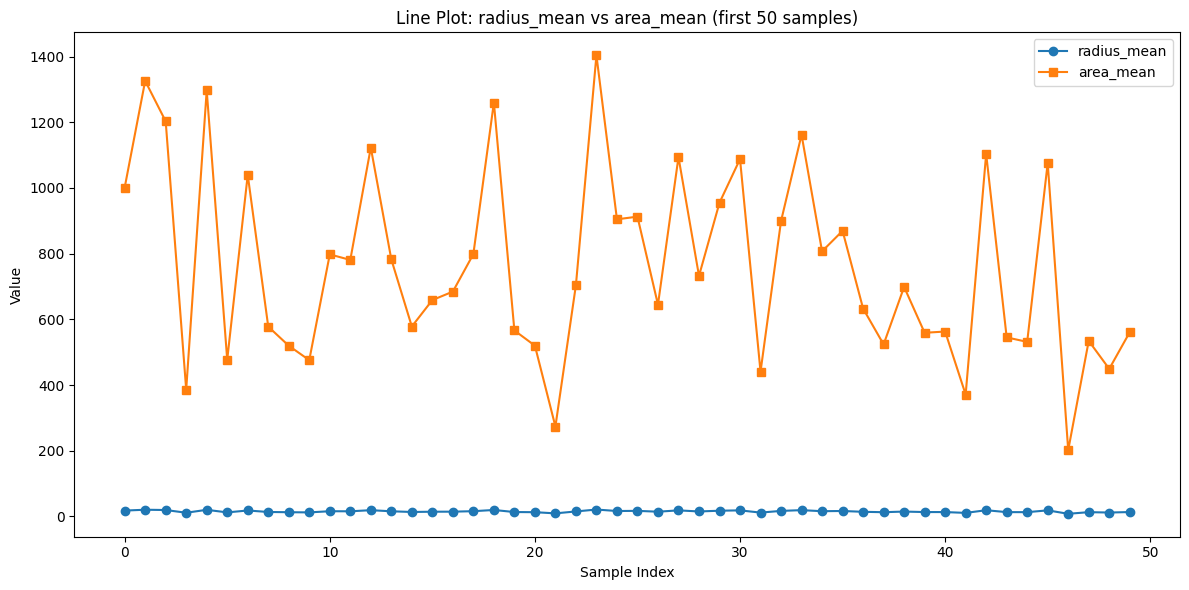

In [7]:
# Line plot: comparing radius_mean and area_mean over samples
plt.figure(figsize=(12, 6))
plt.plot(df['radius_mean'][:50].values, label='radius_mean', marker='o')
plt.plot(df['area_mean'][:50].values, label='area_mean', marker='s')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Line Plot: radius_mean vs area_mean (first 50 samples)')
plt.legend()
plt.tight_layout()
plt.savefig("line_plot_features.png")
plt.show()


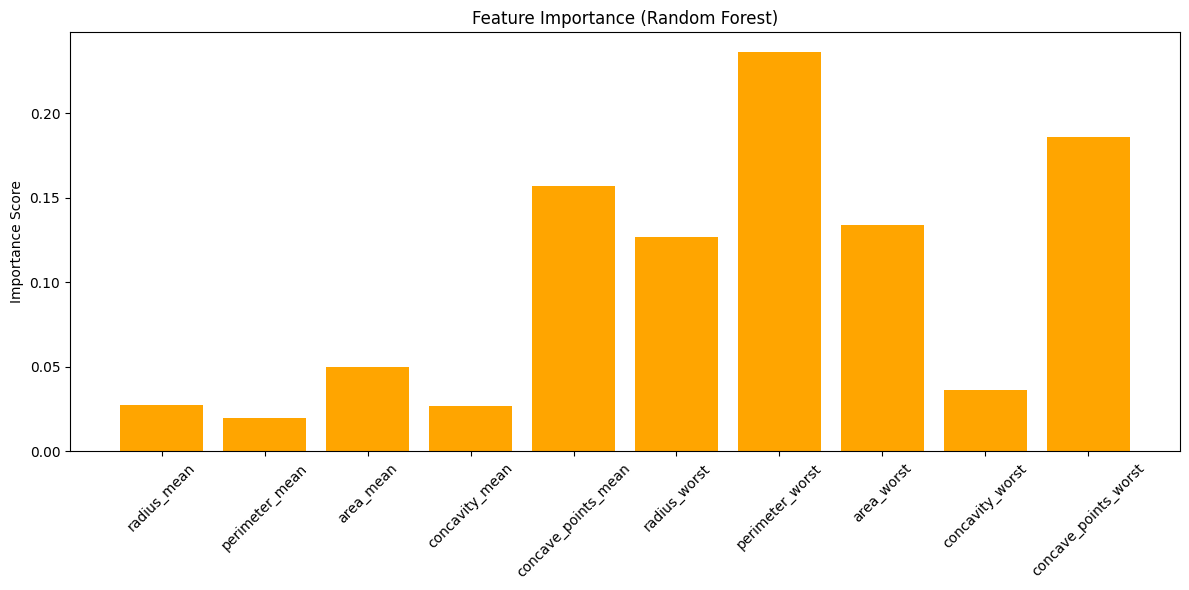

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_names, importances, color='orange')
plt.xticks(rotation=45)
plt.ylabel('Importance Score')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()
